# Single-site voltage trace

author: steeve.laquitaine@epfl.ch; laquitainesteeve@gmail.com  

execution time: 10 secs

### Setup

Activate `spikebias` env kernel

In [4]:
# SETUP PACKAGESP
%load_ext autoreload
%autoreload 2
import os
from os.path import join
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface
import spikeinterface as si
import yaml
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
import spikeinterface.preprocessing as spre
print("spikeinterface", spikeinterface.__version__)

# move to project path
# proj_path = "/Users/steeve_laquitaine/Desktop/2022_2024_bbp/spikebias/"
proj_path = "/home/steeve/steeve/epfl/code/spikebias"
os.chdir(proj_path)

# custom package
from src.nodes.validation import noise

# SETUP PARAMETERS
LAYER = "L5"
DURATION = 1.01
SF_V = 30000 # sampling frequency
SF_S = 40000
SF_B = 32000
SF_E = 20000
SF_dense = 20000
ID_PERIOD_SILI = 51  # 10, 7
ID_PERIOD_VIVO = 7
ID_PERIOD_B = 46  # period near argmax amplitude
ID_PERIOD_E = 6
L5_SITE_SILI = 0
L5_SITE_VIVO = 6
YLIM = (-100, 30)
SITE_B = 352  # 40  # site of argmax amplitude
SITE_E = 232

# setup local path
REC_PATH = "dataset/00_raw/recording_horvath_depth_2"

# setup recording parameters (as described in the paper)
GAIN_TO_UV = 0.195
FREQ_MIN = 300
REF = "global"
OPERATOR = "median"

# FIGURE SETTINGS
FIG_SIZE = (0.9, 0.7)
COLOR_HV = [0.3, 0.3, 0.3]

# axes
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.major.width"] = 0.5 
plt.rcParams["xtick.minor.width"] = 0.5 
plt.rcParams["ytick.major.width"] = 0.5 
plt.rcParams["ytick.minor.width"] = 0.5
plt.rcParams["xtick.major.size"] = 3.5 * 1.1
plt.rcParams["xtick.minor.size"] = 2 * 1.1
plt.rcParams["ytick.major.size"] = 3.5 * 1.1
plt.rcParams["ytick.minor.size"] = 2 * 1.1

# legend
savefig_cfg = {"transparent":True, "dpi":300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}
LG_FRAMEON = False              # no legend frame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
spikeinterface 0.100.5


## Load/prep dataset

In [ ]:
# load recording
Recording = si.load_extractor(REC_PATH)

# set gain to uV (0.195 described in https://doi.org/10.1038/s41597-021-00970-3)
Recording.set_channel_gains(GAIN_TO_UV)

# preprocess
Recording = spre.highpass_filter(Recording, freq_min=FREQ_MIN)
Recording = spre.common_reference(Recording, reference=REF, operator=OPERATOR)

## Extract voltage trace

In [ ]:
# get a site in layer 5
LAYER = "L5"
L5_SITE = 79 
SAMPLE_START = 15868410

# get site id
layers = Recording.get_property("layers")
L5_site = np.where(layers == LAYER)[0][L5_SITE]

# extract a one-second period
one_sec_period = np.arange(SAMPLE_START, SAMPLE_START + SF_dense, 1)

# extract traces
traces = Recording.get_traces()

# extract site trace within period
fig_data = traces[one_sec_period, L5_site]

#np.save(fig_data_paths["fig2e_compo_vivo_horv"], fig_data)

## Plot

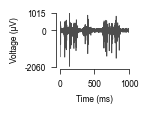

In [ ]:
# setup plot
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)

# plot extracted voltage trace
ax.plot(fig_data, color=COLOR_HV)

# aesthetics
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Voltage (\u03bcV)")
ax.set_xlabel("Time (ms)")
ax.set_xticks([0, SF_dense / 2, SF_dense], [0, 500, 1000])
ax.set_xlim([0, SF_dense])
ax.set_yticks([-2060, 0, 1015], [-2060, 0, 1015])
ax.set_ylim([-2060, 1015])
ax.spines["bottom"].set_position(("axes", -0.05))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("axes", -0.05))

# # save
# if SAVE_FIG:
#     plt.savefig("figures/0_validation/1_components/fig2e_compo_vivo_horv.svg")